In [47]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np


## ~~ Data Exploration

In [48]:
data_file = Path("Resources/Netflix.csv")
df_Netflix = pd.read_csv(data_file)
df_Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


In [49]:
df_Netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [50]:
df_Netflix.shape

(7787, 12)

In [51]:
df_Netflix.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [52]:
df_Netflix.groupby('country').count()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,genres,description
country,,,,,,,,,,,
Argentina,50,50,50,36,46,50,50,50,50,50,50
"Argentina, Brazil, France, Poland, Germany, Denmark",1,1,1,1,1,1,1,1,1,1,1
"Argentina, Chile",1,1,1,1,1,1,1,1,1,1,1
"Argentina, Chile, Peru",1,1,1,1,1,1,1,1,1,1,1
"Argentina, France",1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,1,1,1,1,1,1,1,1,1,1,1
"Venezuela, Colombia",1,1,1,1,0,1,1,1,1,1,1
Vietnam,5,5,5,5,5,5,5,5,5,5,5


In [53]:
df_split_country = df_Netflix['country'].str.split(',', expand=True)
df_split_country.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Brazil,None,None,None,None,None,None,None,None,None,None,None
1,India,None,None,None,None,None,None,None,None,None,None,None
2,Indonesia,None,None,None,None,None,None,None,None,None,None,None
3,United States,None,None,None,None,None,None,None,None,None,None,None
4,United Kingdom,None,None,None,None,None,None,None,None,None,None,None


In [54]:
df_Netflix_merged_country = pd.merge(df_Netflix, df_split_country, left_index=True, right_index=True)
df_Netflix_merged_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,2,3,4,5,6,7,8,9,10,11
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,...,None,None,None,None,None,None,None,None,None,None
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,...,None,None,None,None,None,None,None,None,None,None
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,...,None,None,None,None,None,None,None,None,None,None
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,...,None,None,None,None,None,None,None,None,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,...,None,None,None,None,None,None,None,None,None,None


In [55]:
df_Netflix_merged_country.drop(columns=['country'], inplace=True)
df_Netflix_merged_country.head()


,show_id,type,title,director,cast,date_added,release_year,rating,duration,genres,...,2,3,4,5,6,7,8,9,10,11
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,None,None,None,None,None,None,None,None,None,None
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",...,None,None,None,None,None,None,None,None,None,None
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",...,None,None,None,None,None,None,None,None,None,None
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,Comedies,...,None,None,None,None,None,None,None,None,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",...,None,None,None,None,None,None,None,None,None,None


In [56]:
df_Netflix_merged_country =  df_Netflix_merged_country.rename(columns = {0:'country1',
                                                                        1:'country2',
                                                                        2:'country3',
                                                                        3:'country4',
                                                                        4:'country5',
                                                                        5:'country6',
                                                                        6:'country7',
                                                                        7:'country8',
                                                                        8:'country9',
                                                                        9:'country10',
                                                                        10:'country11',
                                                                        11:'country12'})
df_Netflix_merged_country.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,genres,...,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,None,None,None,None,None,None,None,None,None,None
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",...,None,None,None,None,None,None,None,None,None,None
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",...,None,None,None,None,None,None,None,None,None,None
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,Comedies,...,None,None,None,None,None,None,None,None,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",...,None,None,None,None,None,None,None,None,None,None


In [57]:
df_Netflix_merged_country.drop(columns=['country4','country5','country6','country7','country8','country9','country10', 'country11', 'country12'], inplace=True)
df_Netflix_merged_country.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,genres,description,country1,country2,country3
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil,None,None
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,India,None,None
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,Indonesia,None,None
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,United States,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,United Kingdom,None,None


In [58]:
df_split_genre= df_Netflix['genres'].str.split(',', expand=True)
df_split_genre

,0,1,2
0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,Horror Movies,International Movies,Thrillers
2,Dramas,International Movies,Sports Movies
3,Comedies,None,None
4,British TV Shows,Docuseries,Science & Nature TV
...,...,...,...
7782,International TV Shows,Reality TV,None
7783,Anime Series,International TV Shows,None
7784,Dramas,Independent Movies,International Movies
7785,Comedies,Dramas,Independent Movies


In [59]:
df_Netflix_merged_country_genre = pd.merge(df_Netflix_merged_country, df_split_genre, left_index=True, right_index=True)
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,genres,description,country1,country2,country3,0,1,2
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil,None,None,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,India,None,None,Horror Movies,International Movies,Thrillers
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...,Indonesia,None,None,Dramas,International Movies,Sports Movies
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...,United States,None,None,Comedies,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...,United Kingdom,None,None,British TV Shows,Docuseries,Science & Nature TV


In [60]:
df_Netflix_merged_country_genre.drop(columns=['genres'], inplace=True)
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country1,country2,country3,0,1,2
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,Brazil,None,None,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,India,None,None,Horror Movies,International Movies,Thrillers
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,Indonesia,None,None,Dramas,International Movies,Sports Movies
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,United States,None,None,Comedies,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,United Kingdom,None,None,British TV Shows,Docuseries,Science & Nature TV


In [61]:
df_Netflix_merged_country_genre =  df_Netflix_merged_country_genre.rename(columns = {0:'genre1',
                                                                                    1:'genre2',
                                                                                    2:'genre3',
                                                                                    })
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country1,country2,country3,genre1,genre2,genre3
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,Brazil,None,None,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,India,None,None,Horror Movies,International Movies,Thrillers
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,Indonesia,None,None,Dramas,International Movies,Sports Movies
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,United States,None,None,Comedies,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,United Kingdom,None,None,British TV Shows,Docuseries,Science & Nature TV


In [62]:
df_Netflix_merged_country_genre.groupby(["type"]).count()

,show_id,title,director,cast,date_added,release_year,rating,duration,description,country1,country2,country3,genre1,genre2,genre3
type,,,,,,,,,,,,,,,
Movie,5377,5377,5214,4951,5377,5377,5372,5377,5377,5147,929,324,5377,4063,2106
TV Show,2410,2410,184,2118,2400,2410,2408,2410,2410,2133,224,66,2410,1923,1192


In [63]:
df_Netflix_merged_country_genre.groupby(["release_year"]).count().sort_values(ascending=False, by='show_id').head(10)

,show_id,type,title,director,cast,date_added,rating,duration,description,country1,country2,country3,genre1,genre2,genre3
release_year,,,,,,,,,,,,,,,
2018,1121,1121,1121,728,1000,1120,1121,1121,1121,1021,157,50,1121,853,482
2017,1012,1012,1012,750,893,1012,1010,1012,1012,958,145,49,1012,719,377
2019,996,996,996,578,882,996,996,996,996,899,109,27,996,753,429
2016,882,882,882,637,783,881,882,882,882,820,153,52,882,667,354
2020,868,868,868,441,753,868,868,868,868,805,73,16,868,646,356
2015,541,541,541,385,496,539,538,541,541,502,95,42,541,440,259
2014,334,334,334,247,310,334,334,334,334,315,60,31,334,265,146
2013,267,267,267,204,248,266,266,267,267,257,40,16,267,216,125
2012,219,219,219,159,208,218,219,219,219,208,36,12,219,171,102


In [64]:
df_Netflix_merged_country_genre.groupby(["genre1"]).count().sort_values(ascending=False, by='show_id').head(10)

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country1,country2,country3,genre2,genre3
genre1,,,,,,,,,,,,,,,
Dramas,1384,1384,1384,1373,1378,1384,1384,1383,1384,1384,1353,288,118,1267,694
Comedies,1074,1074,1074,1056,1068,1074,1074,1074,1074,1074,1048,102,27,977,664
Documentaries,751,751,751,707,386,751,751,751,751,751,709,134,53,417,84
Action & Adventure,721,721,721,714,715,721,721,721,721,721,706,180,58,622,394
International TV Shows,690,690,690,46,666,689,690,690,690,690,574,28,6,688,509
Children & Family Movies,502,502,502,471,475,502,502,502,502,502,449,115,35,325,95
Crime TV Shows,369,369,369,46,314,369,369,369,369,369,341,43,11,369,304
Kids' TV,359,359,359,15,325,357,359,358,359,359,297,74,29,154,32
Stand-Up Comedy,321,321,321,296,320,321,321,321,321,321,293,1,0,0,0


In [65]:
df_Netflix_merged_country_genre.drop(columns=['country2','country3','genre2', 'genre3'], inplace=True)
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country1,genre1
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,Brazil,International TV Shows
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,India,Horror Movies
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,Indonesia,Dramas
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,United States,Comedies
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,United Kingdom,British TV Shows


In [66]:

df_Netflix_merged_country_genre=df_Netflix_merged_country_genre.rename(columns={"show_id": "Show ID",
                                                                                "type": "Type",
                                                                                "title":"Title",
                                                                                "director":"Director",
                                                                                "cast":"Cast",
                                                                                "date_added": "Date Added",
                                                                                "release_year": "Release Year",
                                                                                "rating": "Rating",
                                                                                "duration":"Duration",
                                                                                "description": "Description",
                                                                                "country1": "Country 1",
                                                                                "genre1": "Genre 1"
                                                                                })
                                                                          
df_Netflix_merged_country_genre

,Show ID,Type,Title,Director,Cast,Date Added,Release Year,Rating,Duration,Description,Country 1,Genre 1
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,Brazil,International TV Shows
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,India,Horror Movies
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,Indonesia,Dramas
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,United States,Comedies
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,United Kingdom,British TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,Blown Away,NaN,NaN,12-Jul-19,2019,TV-14,1,Ten master artists turn up the heat in glassbl...,Canada,International TV Shows
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",01-Sep-20,2017,TV-MA,2,Determined to throw off the curse of being Sat...,Japan,Anime Series
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",26-Aug-16,2013,NC-17,180,"Determined to fall in love, 15-year-old Adele ...",France,Dramas
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",08-Mar-19,2013,PG-13,98,The high life leads to high anxiety for a fash...,United States,Comedies


In [67]:
df_Netflix_merged_country_genre=df_Netflix_merged_country_genre[["Show ID","Type","Genre 1","Title","Director","Cast","Country 1",
                                                                 "Date Added","Release Year","Rating",
                                                                 "Duration","Description"]]
df_Netflix_merged_country_genre

,Show ID,Type,Genre 1,Title,Director,Cast,Country 1,Date Added,Release Year,Rating,Duration,Description
0,s1,TV Show,International TV Shows,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...
1,s10,Movie,Horror Movies,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...
2,s100,Movie,Dramas,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...
3,s1000,Movie,Comedies,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,British TV Shows,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,International TV Shows,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,Ten master artists turn up the heat in glassbl...
7783,s996,TV Show,Anime Series,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,01-Sep-20,2017,TV-MA,2,Determined to throw off the curse of being Sat...
7784,s997,Movie,Dramas,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",France,26-Aug-16,2013,NC-17,180,"Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Comedies,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,08-Mar-19,2013,PG-13,98,The high life leads to high anxiety for a fash...


## ~~ Data Visualization

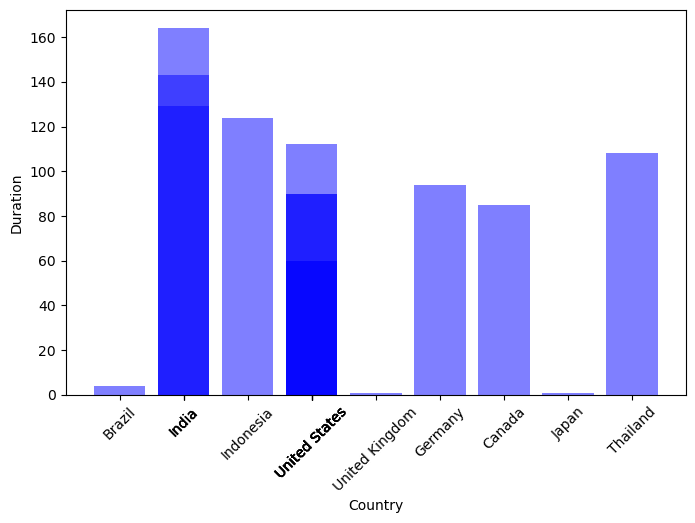

In [127]:
x_axis=df_Netflix_merged_country_genre["Country 1"].head(15)
y_axis=df_Netflix_merged_country_genre["Duration"].head(15)
plt.figure(figsize=(8,5))
plt.bar(x_axis[0:15],y_axis, color='b', alpha=0.5 )
plt.xticks(x_axis[0:15], rotation=45)
plt.xlabel("Country")
plt.ylabel("Duration")
plt.show()

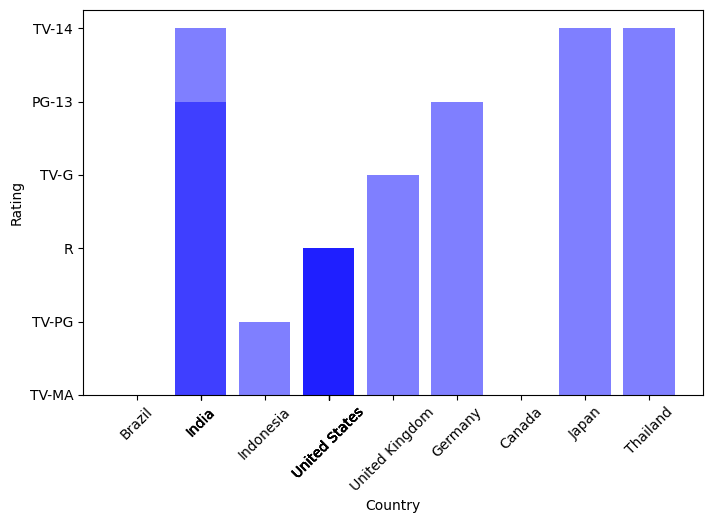

In [153]:
x_axis=df_Netflix_merged_country_genre["Country 1"].head(15)
y_axis=df_Netflix_merged_country_genre["Rating"].head(15).astype(str)
plt.figure(figsize=(8,5))
plt.bar(x_axis[0:15],y_axis, color='b', alpha=0.5 )
plt.xticks(x_axis[0:15], rotation=45)
plt.xlabel("Country")
plt.ylabel("Rating")
plt.show()

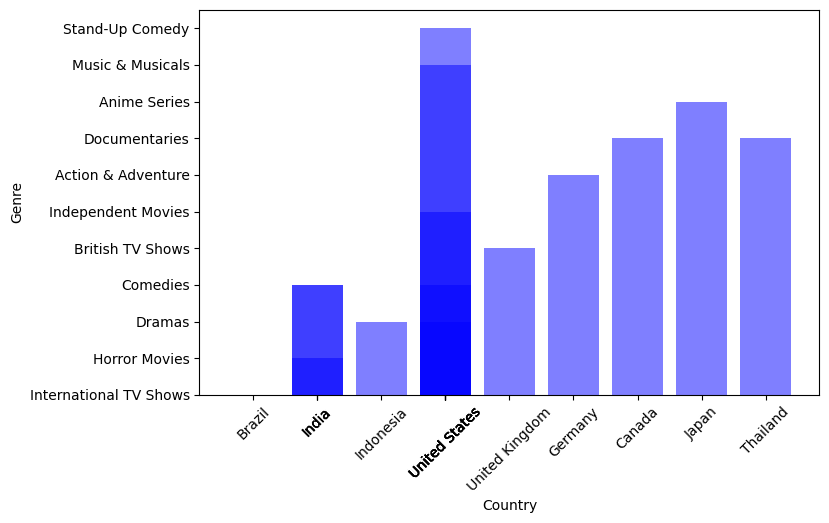

In [151]:
x_axis=df_Netflix_merged_country_genre["Country 1"].head(15)
y_axis=df_Netflix_merged_country_genre["Genre 1"].head(15).astype(str)
plt.figure(figsize=(8,5))
plt.bar(x_axis[0:15],y_axis, color='b', alpha=0.5 )
plt.xticks(x_axis[0:15], rotation=45)
plt.xlabel("Country")
plt.ylabel("Genre")
plt.show()

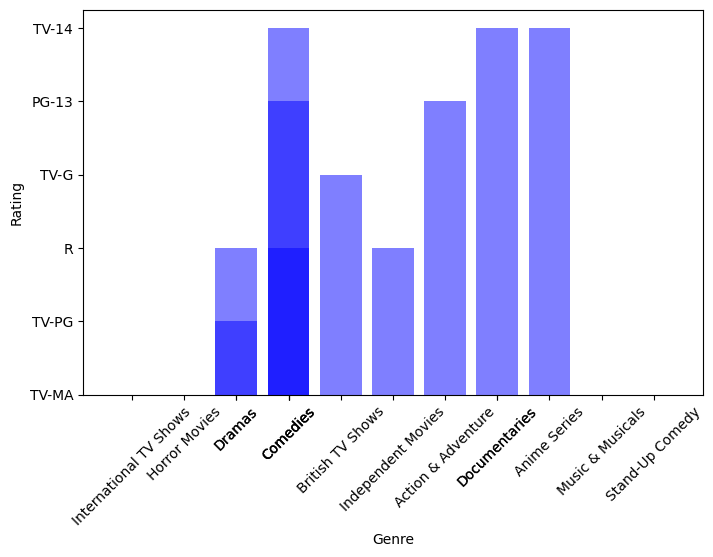

In [157]:
x_axis=df_Netflix_merged_country_genre["Genre 1"].head(15)
y_axis=df_Netflix_merged_country_genre["Rating"].head(15).astype(str)
plt.figure(figsize=(8,5))
plt.bar(x_axis[0:15],y_axis, color='b', alpha=0.5 )
plt.xticks(x_axis[0:15], rotation=45)
plt.xlabel("Genre")
plt.ylabel("Rating")
plt.show()

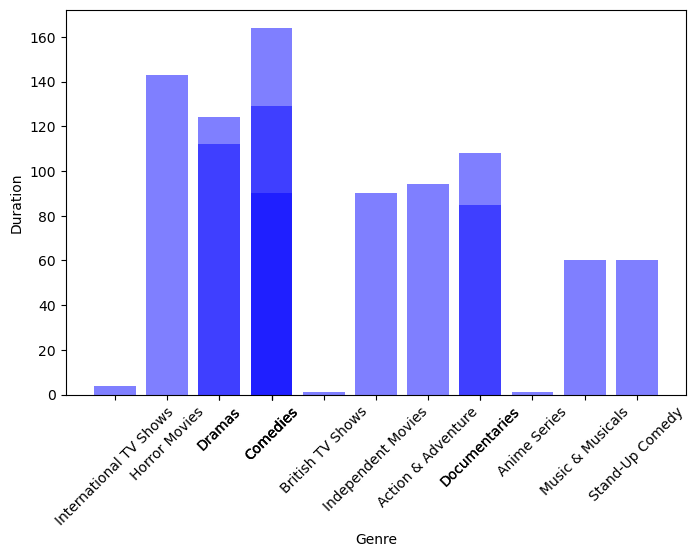

In [126]:
x_axis=df_Netflix_merged_country_genre["Genre 1"].head(15)
y_axis=df_Netflix_merged_country_genre["Duration"].head(15)
plt.figure(figsize=(8,5))
plt.bar(x_axis[0:15],y_axis, color='b', alpha=0.5 )
plt.xticks(x_axis[0:15], rotation=45)
plt.xlabel("Genre")
plt.ylabel("Duration")
plt.show()

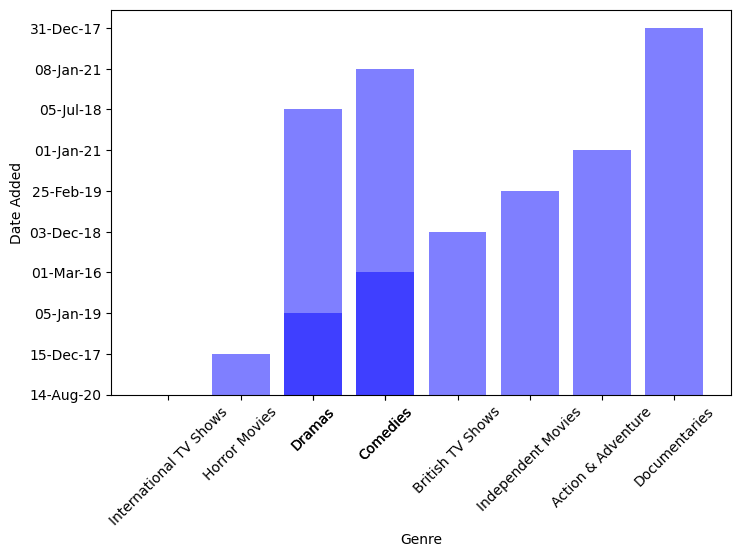

In [134]:
x_axis=df_Netflix_merged_country_genre["Genre 1"].head(10)
y_axis=df_Netflix_merged_country_genre["Date Added"].head(10)
plt.figure(figsize=(8,5))
plt.bar(x_axis[0:10],y_axis, color='b', alpha=0.5 )
plt.xticks(x_axis[0:10], rotation=45)
plt.xlabel("Genre")
plt.ylabel("Date Added")
plt.show()

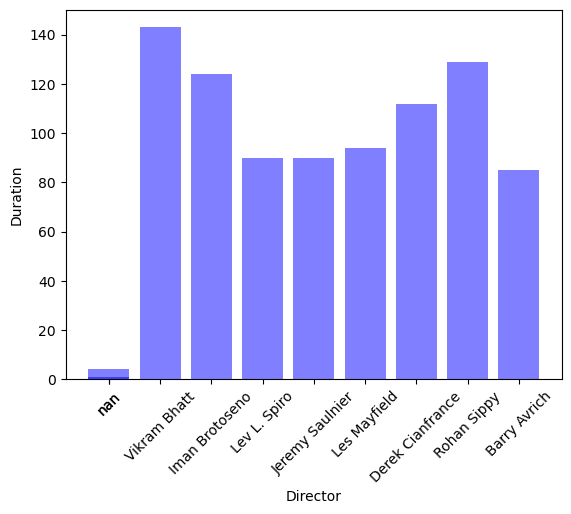

In [147]:
x_axis=df_Netflix_merged_country_genre["Director"].head(10).astype(str)
y_axis=df_Netflix_merged_country_genre["Duration"].head(10).astype(int)
plt.bar(x_axis[0:10],y_axis, color='b', alpha=0.5 )
plt.xticks(x_axis[0:10], rotation=45)
plt.xlabel("Director")
plt.ylabel("Duration")
plt.show()

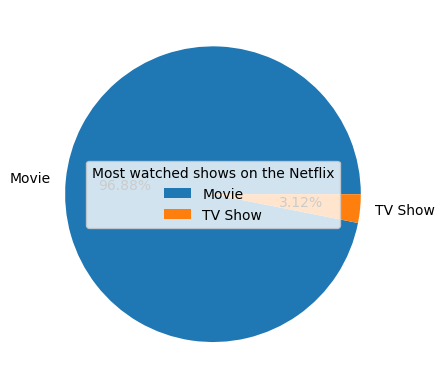

In [124]:
type_show = ['Movie','TV Show']
Value_count = [5522,178]
plt.pie(Value_count,labels=type_show,autopct="%2.2f%%")
plt.legend(title='Most watched shows on the Netflix')

### Data USA